In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
city_df = pd.read_csv("Pyber Resources/city_data.csv")
#city_df.head()
ride_df = pd.read_csv("Pyber Resources/ride_data.csv")
#ride_df.head()

# Scatter Plot

In [3]:
rides_groupby_city = ride_df.groupby("city")

city_rides = pd.DataFrame(rides_groupby_city["fare"].mean())
city_rides = city_rides.rename(columns={"fare":"average_fare"})
city_rides["total_fare"] = rides_groupby_city["fare"].sum()
city_rides["rides_count"] = rides_groupby_city["ride_id"].count()
city_rides.head()

,average_fare,total_fare,rides_count
city,,,
Amandaburgh,24.641667,443.55,18
Barajasview,25.332273,557.31,22
Barronchester,36.422500,582.76,16
Bethanyland,32.956111,593.21,18
Bradshawfurt,40.064000,400.64,10


In [4]:
city_ride_data = pd.merge(city_df,city_rides,how='outer',on='city')
urban_rides=city_ride_data.loc[city_ride_data["type"]=="Urban",:]
rural_rides=city_ride_data.loc[city_ride_data["type"]=="Rural",:]
suburban_rides=city_ride_data.loc[city_ride_data["type"]=="Suburban",:]
city_ride_data.head()
#for type in city_ride_data["type"]:
#    city_ride_data.plot(kind="scatter", x="rides_count", y="average_fare", s=city_ride_data["driver_count"],label=[type])
#city_ride_plot = [city_ride_data.plot(kind="scatter",x="rides_count",y="average_fare",label=type) for type in city_ride_data["type"]]

,city,driver_count,type,average_fare,total_fare,rides_count
0,Richardfort,38,Urban,22.373214,626.45,28
1,Williamsstad,59,Urban,24.362174,560.33,23
2,Port Angela,67,Urban,23.836842,452.90,19
3,Rodneyfort,34,Urban,28.616957,658.19,23
4,West Robert,39,Urban,25.123871,778.84,31


<IPython.core.display.Javascript object>


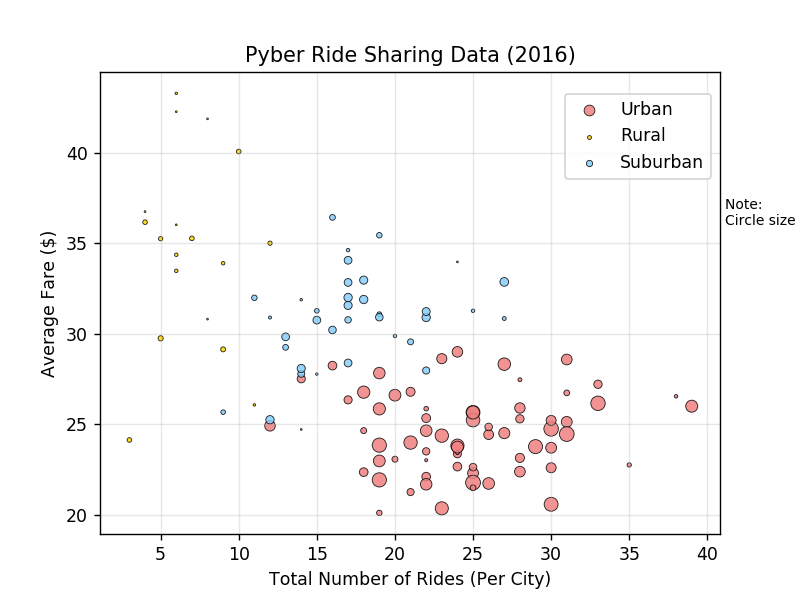

In [5]:
fig1, ax1 = plt.subplots()
urban_rides_plot = ax1.scatter(x=urban_rides["rides_count"], y=urban_rides["average_fare"], s=urban_rides["driver_count"], label="Urban", facecolor= "lightcoral",edgecolor="black",linewidth=0.5, alpha=0.85)
rural_rides_plot = ax1.scatter(x=rural_rides["rides_count"], y=rural_rides["average_fare"], s=rural_rides["driver_count"], label="Rural",facecolor= "gold",edgecolor="black",linewidth=0.5, alpha=0.85)
suburban_rides_plot = ax1.scatter(x=suburban_rides["rides_count"], y=suburban_rides["average_fare"],s=suburban_rides["driver_count"], label="Suburban", facecolor="lightskyblue",edgecolor="black",linewidth=0.5, alpha=0.85)
plt.legend(handles=[urban_rides_plot,rural_rides_plot,suburban_rides_plot],loc='lower right',bbox_to_anchor=(1, 0.75))
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(x=41.1,y=36,s="Note: \nCircle size correlates with driver count per city.",fontsize=8)
plt.grid(alpha=0.3)
#plt.figure(figsize=(50,4))
plt.savefig("PyberRideSharing.png")
plt.show()

In [ ]:
#fig4, ax4= plt.subplots()
#colors = ["gold","lightskyblue","lightcoral"]
#citay_type = ["Rural", "Suburban", "Urban"]
#color_city = pd.DataFrame({"city":city_type,
#              "color":colors
#             })
#color_city
#plot_fig_out = [ax4.scatter(x=city_ride_data["rides_count"], y=city_ride_data["average_fare"], s=city_ride_data["driver_count"], colors=colors.city.index) for city.index in city.city_type]

# Pie Charts 

In [6]:
city_type_groups = city_ride_data.groupby("type")
city_type_demographics = pd.DataFrame(city_type_groups["total_fare"].sum())
city_type_demographics["total_drivers"] = city_type_groups["driver_count"].sum()
city_type_demographics["total_rides"] = city_type_groups["rides_count"].sum()
city_type_demographics

,total_fare,total_drivers,total_rides
type,,,
Rural,4327.93,78,125
Suburban,19356.33,490,625
Urban,39854.38,2405,1625


<IPython.core.display.Javascript object>


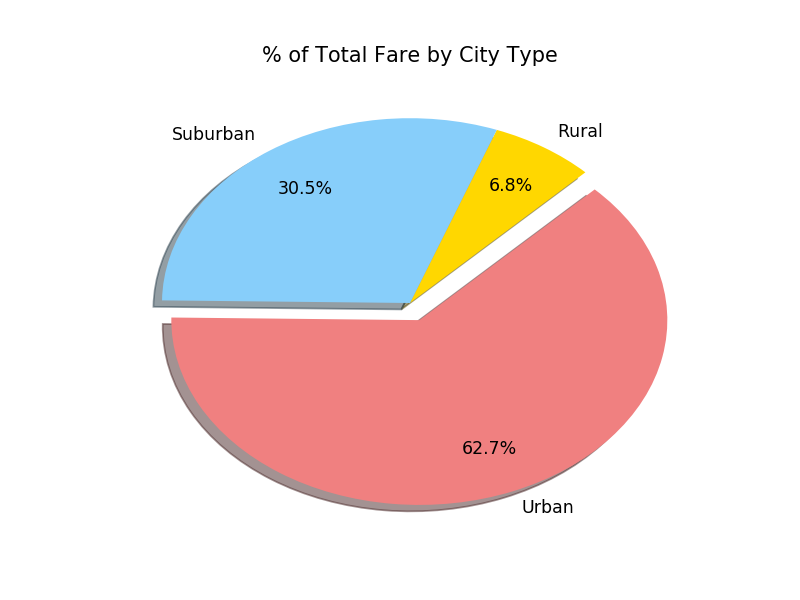

In [7]:
fig2, ax2 = plt.subplots()
colors=["gold","lightskyblue","lightcoral"]
explode=[0,0,0.1]
ax2.pie(x=city_type_demographics["total_fare"],colors=colors,explode=explode,autopct='%1.1f%%', pctdistance=0.75,
        shadow=True,startangle=45, labels=city_type_demographics.index)
#plt.legend(loc='best')
plt.title("% of Total Fare by City Type")
plt.show()
plt.savefig("TotalFarebyCityType")

<IPython.core.display.Javascript object>


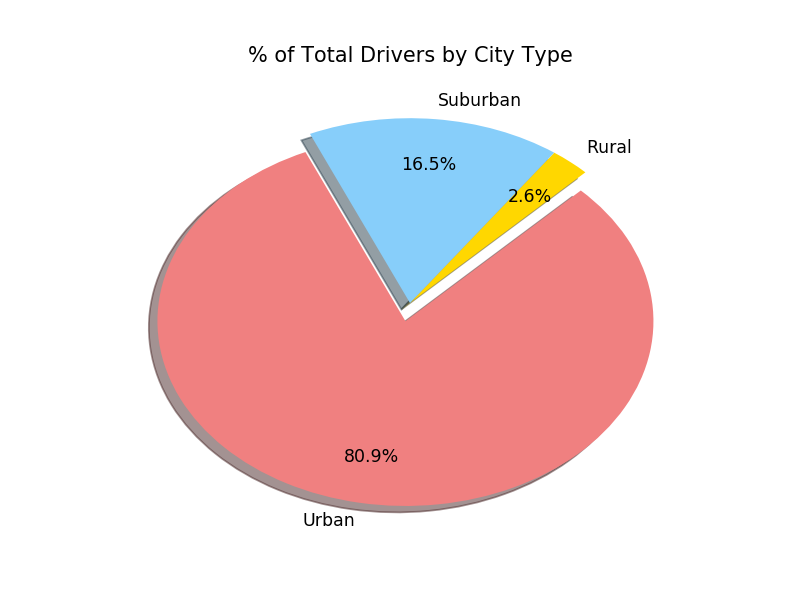

In [8]:
fig3, ax3=plt.subplots()
ax3.pie(x=city_type_demographics["total_drivers"],labels= city_type_demographics.index,colors=colors, 
        explode=explode,autopct='%1.1f%%',pctdistance=0.75,startangle=45,shadow=True)
#plt.legend(loc='best')
plt.title("% of Total Drivers by City Type")
plt.show()
plt.savefig("TotalDriversbyCityType")

<IPython.core.display.Javascript object>


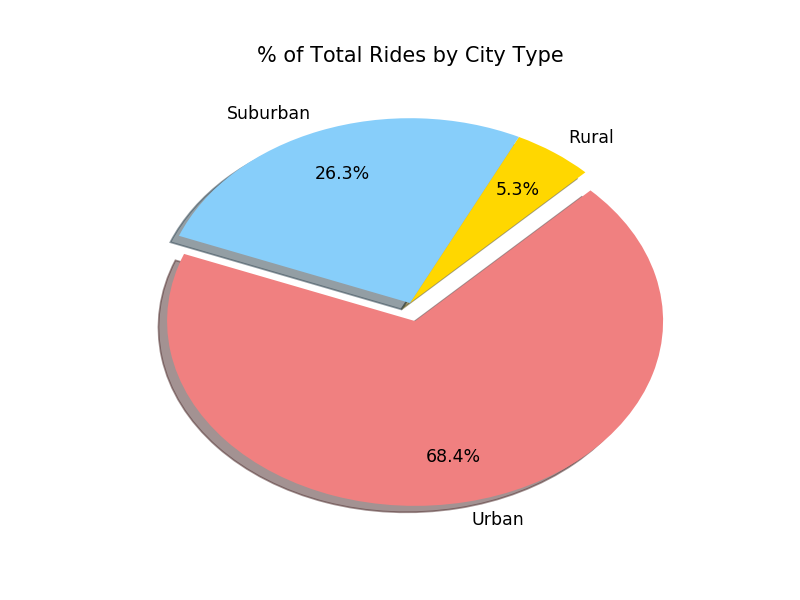

In [9]:
fig4, ax4=plt.subplots()
ax4.pie(x=city_type_demographics["total_rides"],labels= city_type_demographics.index,
        colors=colors, explode=explode,autopct='%1.1f%%',pctdistance=0.75,startangle=45,shadow=True)
#plt.legend(loc='best')
plt.title("% of Total Rides by City Type")
plt.show()
plt.savefig("TotalRidesbyCityType")

<IPython.core.display.Javascript object>


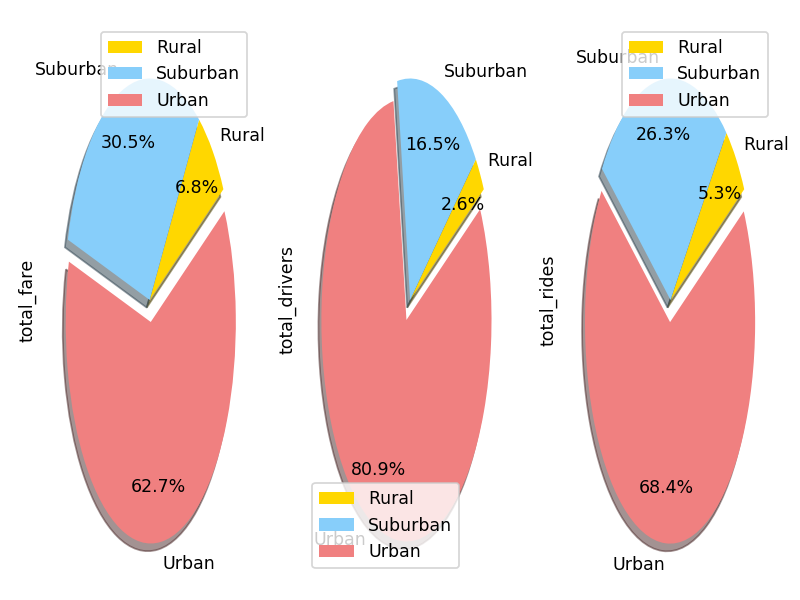

In [10]:
#Another way to do all 3 in one step
colors=["gold","lightskyblue","lightcoral"]
explode=[0,0,0.1]
city_type_demographics.plot(kind="pie",colors=colors,autopct='%1.1f%%',pctdistance=0.75, 
                            explode=explode,subplots=True, startangle=30, shadow=True)
plt.tight_layout()
plt.show()

# Observations from the plots:
-  Urban cities; have the largest total fare and the largest number of drivers and the largest number of rides.
-  However for urban cities; they the lowest average fare so it looks like there are a lot of short rides there.
-  As for rural cities; they have the least number of rides and least number of drivers as well as the least total fare .
-  However for rural cities; they have the largest average fare so it seems that most of the rides are long ones.
